<a href="https://colab.research.google.com/github/devilgupta/C115-logistic-regression/blob/main/C115.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
upload=files.upload()

Saving C115.csv to C115.csv


In [3]:
import pandas as pd
import plotly.express as px 
 
df=pd.read_csv("C115.csv")
score_list=df["Score"].tolist()
accepted_list=df["Accepted"].tolist()

fig=px.scatter(x=score_list,y=accepted_list)
fig.show()

In [4]:
import numpy as np
score_array=np.array(score_list)
accepted_array=np.array(accepted_list)

m,c=np.polyfit(score_array,accepted_array,1)
y=[]
for x in score_array:
  y_value=m*x+c   
  y.append(y_value)

fig=px.scatter(x=score_array,y=accepted_array)
fig.update_layout(shapes=[
                          dict(
                              type="line",
                              y0=min(y),y1=max(y),
                              x0=min(score_array),x1=max(score_array),
                               
                          )
])
fig.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



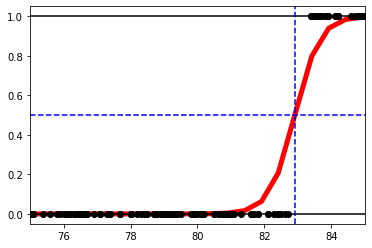

In [13]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

X=np.reshape(score_list,(len(score_list),1))
Y=np.reshape(accepted_list,(len(accepted_list),1))

lr=LogisticRegression()
lr.fit(X,Y)
plt.figure()
plt.scatter(X.ravel(),Y,color="black",zorder=20)

def model(x):
  return 1/(1+np.exp(-x))

X_test=np.linspace(0,100,200)
chances=model(X_test*lr.coef_+lr.intercept_).ravel()

plt.plot(X_test,chances,color="red",linewidth=5)
plt.axhline(y=0,color='k',linestyle='-')
plt.axhline(y=1,color='k',linestyle='-')
plt.axhline(y=0.5,color='b',linestyle='--')

plt.axvline(x=X_test[165],color='b',linestyle='--')

plt.ylabel=("y")
plt.xlabel=("X")

plt.xlim(75,85)
plt.show()

In [19]:
user_score=float(input("Enter your marks here:-->"))
chances=model(user_score*lr.coef_+lr.intercept_).ravel()
if chances <= 0.01:
  print("The student will not get accepted")
elif chances >= 1:
  print("The student will get accepted")
elif chances <= 0.5:
  print("The student might not get accepted")
else:
  print("The student may get accepted")

Enter your marks here:-->40
The student will not get accepted
